In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

#eclf = StackingClassifier(estimators=est,final_estimator=LogisticRegression(max_iter=1000, n_jobs=8),n_jobs=8)


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [99]:
df= pd.read_csv('TrainOnMe.csv')
df_val= pd.read_csv('EvaluateOnMe.csv')

In [3]:
pd.set_option('display.max_rows',1000)
df

,Unnamed: 0,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,0,Shoogee,1.622430e+00,-15.51242,-0.11115,16.86347,-3.55037,GMMs and Accordions,0.21564,51.35588,-74.79739,4.41501,-20.16615,True
1,1,Atsuto,-3.380391e+01,-15.44170,0.78171,28.11765,6.41342,Bayesian Inference,18.70829,12.72187,-78.84386,6.42020,-20.07421,False
2,2,Bob,-1.049048e+01,-15.48716,0.19168,16.87734,11.41567,Bayesian Inference,-8.57972,6.02294,-78.18658,10.44804,-20.13331,False
3,3,Atsuto,-1.839930e+01,-15.47262,0.39385,0.32310,-1.22566,Bayesian Inference,8.81810,-8.26627,-78.24734,8.27237,-20.11441,False
4,4,Jorg,-3.806452e+01,-15.37007,0.74519,3.12356,0.15829,Bayesian Inference,-2.90392,-11.76543,-79.92011,7.23429,-19.98109,False
5,5,Atsuto,2.135280e+00,-15.47278,-0.21677,11.62632,-1.78539,GMMs and Accordions,5.60305,-23.30847,-75.35696,8.98161,-20.11462,True
6,6,Bob,-1.206341e+01,-15.39016,0.01734,1.92766,-2.52138,Bayesian Inference,-14.80564,21.27088,-78.26144,8.06903,-20.00721,False
7,7,Atsuto,-1.002750e+00,-15.45690,-0.15962,3.50596,2.04260,Bayesian Inference,1.78448,-16.20681,-76.73808,7.70020,-20.09396,False
8,8,Jorg,-1.288126e+01,-15.44137,0.15842,7.79609,0.34916,Bayesian Inference,-1.90421,18.03565,-77.61847,5.77048,-20.07378,False
9,9,Jorg,1.453500e-01,-15.43310,-0.24804,12.47875,-4.24306,GMMs and Accordions,-4.48597,-27.31991,-73.56616,5.75394,-20.06303,True


In [4]:
rows=df[df.isna().any(axis=1)]
rows

,Unnamed: 0,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
173,173,NaN,-5.89826,-15.49745,0.07850,15.76887,7.09385,Bayesian Inference,-9.45513,-41.74396,-74.87425,5.62655,-20.14669,False
258,Þarf sás þér skal hvarfa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,þengill fyr kné lengi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,(svarar hógliga hverju),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,hugborð (konungr orði);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,fáir erum vér,né frýju,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,frændr,órum þó vændir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,(minnumk meir á annat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,mitt starf) konungdjarfir.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,438,Atsuto,-20.90675,-15.52179,0.58056,12.19680,3.43925,NaN,-5.72169,-8.09088,-77.73056,8.28782,-20.17833,False


### Clean the data from the not existing values.

In [5]:
df_zero_nan=df.drop([173,258,259,260,261,262,263,264,265,704,1000,742,830])
df_zero_nan_model2=df.drop([173,258,259,260,261,262,263,264,265,446,614,704,1000,742,830])
df_zero_nan_model3=df.drop([173,258,259,260,261,262,263,264,265,446,614,704,1000,742,830])

#df['x1'].where(df['x1'] < -50) #742, 830 

#446,614 #zero_nan, no nan in this data!
#Note that we left 446 and 614, in one case we will not take their nan values into account since we will drop this
#column and in the other case we will drop them and perform some kind of categorical varaiable techinque.
#df_new=df.drop(rows)

In [6]:
Grabbar = df_zero_nan['y'] #Grabbarna that we want to classify!
Grabbar2=df_zero_nan_model2['y']
df_reduced =df_zero_nan.drop(columns=['y']) #reduced contains all the variables without the target variable.
df_reduced_2=df_zero_nan_model2.drop(columns=['y'])

In [7]:
# Make copy to avoid changing original data 
label_Y = Grabbar.copy()
label_Y2 = Grabbar2.copy()
#label_Y_valid = Y_Test.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
label_encoder.fit(['Atsuto','Bob','Jorg','Shoogee'])
list(label_encoder.classes_)
label_y = label_encoder.transform(label_Y)
label_y2=label_encoder.transform(label_Y2)
label_y_df = pd.DataFrame(label_y, columns = ['Grabbar'])
label_y_df2 =pd.DataFrame(label_y2, columns = ['Grabbar'])

#Note that after we are done with this project we will perform inverse_transform(y), in order to have names again.

### Let us skip the categorical data, boolean column and the unnamed column.

In [83]:
df_first=df_reduced.drop(columns=['x6','x12','Unnamed: 0']) #OBS vi tog bort x2/x11 för att kolla lite ,'x4'
df_second=df_reduced_2.drop(columns=['Unnamed: 0'])
df_third=df_reduced_2.drop(columns=['Unnamed: 0','x2'])#'x12'


df_second['x6'].value_counts()
df_second['x12'].value_counts()
df_second.loc[208]['x12']
df_second.at[208, 'x12'] = 'False'
df_second.at[722,'x12']='False'
df_second.loc[208]['x12']
df_second.at[189,'x6']= 'Bayesian Inference'
df_second.at[324,'x6']= 'Bayesian Inference'

df_second['x6'].value_counts()
df_second['x12'].value_counts()
df_third.loc[208]['x12']   ##OBS remember these!!!!
df_third.at[208, 'x12'] = 'False'
df_third.at[722,'x12']='False'
df_third.loc[208]['x12']

df_third.at[189,'x6']= 'Bayesian Inference'
df_third.at[324,'x6']= 'Bayesian Inference'

#X_train, X_test, Y_train, Y_test = train_test_split(df_first,Grabbar, test_size=0.33, random_state = 0)
X_train, X_test, Y_train, Y_test = train_test_split(df_first,label_y_df,test_size=0.33,random_state=0)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(df_second,label_y_df2,test_size=0.33,random_state=0)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(df_third,label_y_df2,test_size=0.33,random_state=0)



In [81]:
classification_models = []
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=200, criterion="entropy",random_state=0)))#random_state=0
classification_models.append(('GaussianNaiveBayes',GaussianNB()))
classification_models.append(('SupportVectorMachineClassifier',SVC(kernel='rbf')))
classification_models.append(('KNN',KNeighborsClassifier(n_neighbors=15)))
classification_models.append(('XGboost',XGBClassifier()))
classification_models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
classification_models.append(('LogisticRegression',LogisticRegression(multi_class='multinomial')))
classification_models.append(('QuadraticDA',QuadraticDiscriminantAnalysis()))#priors=[0.1, 0.3, 0.2, 0.5]
classification_models.append(('LinearcDA',LinearDiscriminantAnalysis()))
classification_models.append(('DecisionTreeClassifier', DecisionTreeClassifier(criterion="entropy",random_state=0)))
classification_models.append(('BaggingClassifier', BaggingClassifier()))
classification_models.append(('MLPClassifier', MLPClassifier()))
#classification_models.append(('KMeans', KMeans(n_clusters=4,random_state=0)))








In [75]:
def score(classification_models,X_train,X_test,Y_train,Y_test,X,Y):
    for i,v in classification_models:
        clf=v
        clf.fit(X_train, Y_train)
        prediction=clf.predict(X_test)
        Y_test_prediction=Y_test.to_numpy()
        Y_test_prediction = np.concatenate( Y_test_prediction, axis=0)
        #score = accuracy_score(Y_test_prediction, prediction)
        scores = cross_val_score(clf, X, Y, cv=5, verbose=1)
        print(i)
        print(scores)
        print("Score: %0.3f +- %0.3f" % (scores.mean(), scores.std()))
    return "done"

In [66]:
print(score(classification_models,X_train,X_test,Y_train,Y_test,df_first,label_y_df))

<ipython-input-65-0cfe8f838e9d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/mode

Random Forest
[0.71859296 0.71356784 0.69346734 0.73869347 0.74371859]
Score: 0.722 +- 0.018
GaussianNaiveBayes
[0.64824121 0.62311558 0.67336683 0.61809045 0.64824121]
Score: 0.642 +- 0.020
SupportVectorMachineClassifier
[0.54271357 0.57286432 0.50251256 0.51256281 0.53768844]
Score: 0.534 +- 0.025


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBCla

KNN
[0.55778894 0.6281407  0.53768844 0.57286432 0.61809045]
Score: 0.583 +- 0.035
[13:26:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:26:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGboost
[0.72864322 0.73366834 0.67839196 0.69849246 0.72864322]
Score: 0.714 +- 0.022


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: 

GradientBoostingClassifier
[0.74874372 0.72361809 0.66834171 0.66331658 0.71356784]
Score: 0.704 +- 0.033


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Vari

LogisticRegression
[0.54271357 0.51758794 0.5678392  0.59798995 0.53768844]
Score: 0.553 +- 0.028
QuadraticDA
[0.73869347 0.72361809 0.71859296 0.74371859 0.77889447]
Score: 0.741 +- 0.021
LinearcDA
[0.53266332 0.59798995 0.59798995 0.59296482 0.53266332]
Score: 0.571 +- 0.031
DecisionTreeClassifier
[0.65829146 0.66331658 0.65326633 0.64824121 0.68844221]
Score: 0.662 +- 0.014


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

BaggingClassifier
[0.72864322 0.68341709 0.69849246 0.69849246 0.71859296]
Score: 0.706 +- 0.016


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582

MLPClassifier
[0.65829146 0.59798995 0.61306533 0.67336683 0.66331658]
Score: 0.641 +- 0.030
done


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


### Many methods require standardized data in order to work correctly.

In [67]:
scaler= StandardScaler()
X_train_Standard =scaler.fit_transform(X_train)
X_test_Standard=scaler.fit_transform(X_test)

In [68]:
print(score(classification_models,X_train_Standard,X_test_Standard,Y_train,Y_test,df_first,label_y_df))

<ipython-input-65-0cfe8f838e9d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/mode

Random Forest
[0.71859296 0.71356784 0.69346734 0.73869347 0.74371859]
Score: 0.722 +- 0.018
GaussianNaiveBayes
[0.64824121 0.62311558 0.67336683 0.61809045 0.64824121]
Score: 0.642 +- 0.020
SupportVectorMachineClassifier
[0.54271357 0.57286432 0.50251256 0.51256281 0.53768844]
Score: 0.534 +- 0.025


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was 

KNN
[0.55778894 0.6281407  0.53768844 0.57286432 0.61809045]
Score: 0.583 +- 0.035
[13:26:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:26:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGboost
[0.72864322 0.73366834 0.67839196 0.69849246 0.72864322]
Score: 0.714 +- 0.022


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: 

GradientBoostingClassifier
[0.75879397 0.72361809 0.68341709 0.68341709 0.71356784]
Score: 0.713 +- 0.028
LogisticRegression
[0.54271357 0.51758794 0.5678392  0.59798995 0.53768844]
Score: 0.553 +- 0.028


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs

QuadraticDA
[0.73869347 0.72361809 0.71859296 0.74371859 0.77889447]
Score: 0.741 +- 0.021
LinearcDA
[0.53266332 0.59798995 0.59798995 0.59296482 0.53266332]
Score: 0.571 +- 0.031
DecisionTreeClassifier
[0.65829146 0.66331658 0.65326633 0.64824121 0.68844221]
Score: 0.662 +- 0.014


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

BaggingClassifier
[0.73869347 0.63819095 0.67839196 0.70351759 0.68844221]
Score: 0.689 +- 0.033


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y

MLPClassifier
[0.68341709 0.61306533 0.58291457 0.64824121 0.75879397]
Score: 0.657 +- 0.061
done


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


In [23]:
#from sklearn.model_selection import GridSearchCV

#from sklearn import svm
#parameters = {'kernel':(['rbf']), 'C':[0.1,1,2,3,4,5,6,8,16,32]}
#svc = svm.SVC()
#clf = GridSearchCV(svc, parameters, cv=10)
#clf.fit(X_train_Standard,Y_train)
#clf.score(X_test_Standard, Y_test)


#sorted(clf.cv_results_.keys())
#accuracy_score(y, prediction)

## We will try to improve our models by using clomuns x6 and x12

In [24]:
label_X_train = X_train_2.copy() 
label_X_test = X_test_2.copy()
label_X_df=df_second.copy()
label_X_df_3=df_third.copy()
#label_Y_df=label_y_df2.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in [['x6'],['x12']]:#for col in [['x6'],['x12']]
    label_X_train[col] = label_encoder.fit_transform(X_train_2[col])
    label_X_df[col] = label_encoder.fit_transform(df_second[col])
    label_X_test[col] = label_encoder.transform(X_test_2[col])
    
for col in [['x6'],['x12']]:
    label_X_df_3[col] = label_encoder.fit_transform(df_third[col])
  

/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
print(score(classification_models,label_X_train,label_X_test,Y_train_2,Y_test_2,label_X_df,label_y_df2))

<ipython-input-19-0cfe8f838e9d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/mode

Random Forest
[0.72864322 0.71859296 0.68844221 0.73232323 0.71717172]
Score: 0.717 +- 0.015
GaussianNaiveBayes
[0.6281407  0.6080402  0.59798995 0.62121212 0.60606061]
Score: 0.612 +- 0.011
SupportVectorMachineClassifier
[0.54271357 0.57286432 0.50251256 0.52525253 0.54040404]
Score: 0.537 +- 0.023


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s 

KNN
[0.55778894 0.6281407  0.53768844 0.58080808 0.61111111]
Score: 0.583 +- 0.033
[13:08:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:08:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGboost
[0.72361809 0.71356784 0.68844221 0.6969697  0.72222222]
Score: 0.709 +- 0.014


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: 

GradientBoostingClassifier
[0.73869347 0.70854271 0.68341709 0.67676768 0.73737374]
Score: 0.709 +- 0.026


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: 

LogisticRegression
[0.54271357 0.51758794 0.55778894 0.60606061 0.55050505]
Score: 0.555 +- 0.029
QuadraticDA
[0.73366834 0.73366834 0.64824121 0.6969697  0.76262626]
Score: 0.715 +- 0.039
LinearcDA
[0.55778894 0.52763819 0.55276382 0.5959596  0.52020202]
Score: 0.551 +- 0.027
DecisionTreeClassifier
[0.65829146 0.70351759 0.64824121 0.64141414 0.65151515]
Score: 0.661 +- 0.022


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: 

BaggingClassifier
[0.67839196 0.66834171 0.68341709 0.71717172 0.6969697 ]
Score: 0.689 +- 0.017


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y

MLPClassifier
[0.67839196 0.63819095 0.58291457 0.62626263 0.71717172]
Score: 0.649 +- 0.046
done


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


In [26]:
scaler2 = StandardScaler()
X_train_Standard2 = scaler.fit_transform(label_X_train)
X_test_Standard2 = scaler.fit_transform(label_X_test)

In [27]:
print(score(classification_models,X_train_Standard2,X_test_Standard2,Y_train_2,Y_test_2,label_X_df,label_y_df2))

<ipython-input-19-0cfe8f838e9d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/mode

Random Forest
[0.72864322 0.71859296 0.68844221 0.73232323 0.71717172]
Score: 0.717 +- 0.015
GaussianNaiveBayes
[0.6281407  0.6080402  0.59798995 0.62121212 0.60606061]
Score: 0.612 +- 0.011
SupportVectorMachineClassifier
[0.54271357 0.57286432 0.50251256 0.52525253 0.54040404]
Score: 0.537 +- 0.023


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBCla

KNN
[0.55778894 0.6281407  0.53768844 0.58080808 0.61111111]
Score: 0.583 +- 0.033
[13:09:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:09:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGboost
[0.72361809 0.71356784 0.68844221 0.6969697  0.72222222]
Score: 0.709 +- 0.014


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: 

GradientBoostingClassifier
[0.73869347 0.70854271 0.66834171 0.68181818 0.73737374]
Score: 0.707 +- 0.028
LogisticRegression
[0.54271357 0.51758794 0.55778894 0.60606061 0.55050505]
Score: 0.555 +- 0.029


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
/Users/wojtasrat

QuadraticDA
[0.73366834 0.73366834 0.64824121 0.6969697  0.76262626]
Score: 0.715 +- 0.039
LinearcDA
[0.55778894 0.52763819 0.55276382 0.5959596  0.52020202]
Score: 0.551 +- 0.027
DecisionTreeClassifier
[0.65829146 0.70351759 0.64824121 0.64141414 0.65151515]
Score: 0.661 +- 0.022


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

BaggingClassifier
[0.66331658 0.67839196 0.69346734 0.72727273 0.70707071]
Score: 0.694 +- 0.022


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y

MLPClassifier
[0.66834171 0.6281407  0.57286432 0.66666667 0.6969697 ]
Score: 0.647 +- 0.043
done


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


In [28]:
label_X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
124,-4.82932,-15.45408,-0.05219,-1.69488,-0.75090,1,2.54547,-5.48526,-72.96148,8.00749,-20.09030,0
899,-12.31676,-15.39415,0.03397,12.58413,3.72722,0,12.56568,-3.86231,-78.13172,5.71217,-20.01239,0
408,0.79723,-15.47733,-0.16660,7.44296,4.20690,1,-1.99676,-1.27715,-75.09629,5.82891,-20.12053,1
866,-25.91660,-15.41807,0.49316,17.83325,2.27990,0,-1.28413,13.47955,-78.89294,5.57870,-20.04349,0
959,-21.64208,-15.40887,0.34501,16.53205,-4.58506,0,17.39230,-40.38977,-77.57582,7.67191,-20.03154,0
477,-17.74177,-15.39742,0.20284,12.62120,8.25991,0,4.15886,8.54515,-76.97921,7.92951,-20.01664,0
118,-12.21147,-15.36925,-0.02592,10.50796,-0.39211,0,-0.25263,20.89465,-77.04070,7.91197,-19.98003,0
12,-13.24424,-15.42325,0.12791,1.06133,7.99599,0,-9.99321,15.00159,-76.78472,8.25805,-20.05022,0
157,-25.89372,-15.35508,0.34887,19.22202,1.93817,0,-23.50075,36.20932,-80.90492,10.41279,-19.96160,0
127,-28.71566,-15.41637,0.57257,5.72798,-5.02839,0,7.30434,-24.65289,-76.57453,7.15199,-20.04128,0


In [29]:
#object_cols=['x6','x12']
# Apply one-hot encoder to each column with categorical data
#OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train_2[object_cols]))
#OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test_2[object_cols]))

# One-hot encoding removed index; put it back
#OH_cols_train.index = X_train_2.index
#OH_cols_test.index = X_test_2.index

# Remove categorical columns (will replace with one-hot encoding)
#num_X_train = X_train_2.drop(object_cols, axis=1)
#num_X_test = X_test_2.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
#OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
#OH_X_test = pd.concat([num_X_test, OH_cols_valid], axis=1)

#print("MAE from Approach 3 (One-Hot Encoding):") 
#print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

In [30]:
#OH_X_test
#X_train_2

In [31]:
#OH_cols_train

In [32]:
#OH_X_train

In [33]:
#print(score(classification_models,OH_X_train,OH_X_test,Y_train_2,Y_test_2))

In [34]:
#scaler2= StandardScaler()
#X_train_Standard2 =scaler.fit_transform(OH_X_train)
#X_test_Standard2=scaler.fit_transform(OH_X_test)

In [35]:
#print(score(classification_models,X_train_Standard2,X_test_Standard2,Y_train_2,Y_test_2))

### Correlations?

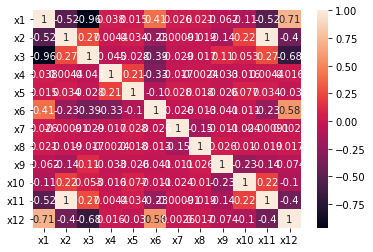

In [36]:
dataframe = pd.concat([label_X_train, label_X_test], axis=0)
corrMatrix = dataframe.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={'size':10})
plt.show() #We see that x3 and x1 have -96% correlation, and x2 with x11 have 100%, x1 with x12 have -71%...
#We try to remove x12 and x3 

In [37]:
#dataframe

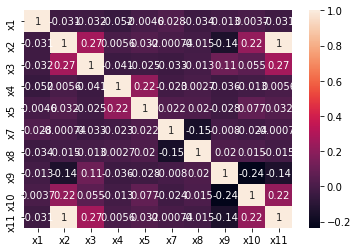

In [38]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={'size':10})
plt.show() #We see that x3 and x1 have -96% correlation, and x2 with x11 have 100%, x1 with x12 have -71%...
#We try to remove x12 and x3 

In [39]:
label_X_train_3 = X_train_3.copy() 
label_X_test_3 = X_test_3.copy()

# Apply label encoder to each column with categorical data
label_encoder3 = LabelEncoder()

for col in [['x6'],['x12']]:#for col in [['x6'],['x12']]
    label_X_train_3[col] = label_encoder3.fit_transform(X_train_3[col])
    label_X_test_3[col] = label_encoder3.transform(X_test_3[col])

/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [204]:
scaler3 = StandardScaler()
X_train_Standard3 = scaler3.fit_transform(label_X_train_3)
X_test_Standard3 = scaler3.fit_transform(label_X_test_3)

In [205]:
print(score(classification_models,X_train_Standard3,X_test_Standard3,Y_train_2,Y_test_2,label_X_df_3,label_y_df2 ))

<ipython-input-75-0cfe8f838e9d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/mode

Random Forest
[0.68341709 0.71859296 0.69849246 0.71212121 0.72222222]
Score: 0.707 +- 0.014
GaussianNaiveBayes
[0.63819095 0.63316583 0.60301508 0.60606061 0.62626263]
Score: 0.621 +- 0.014
SupportVectorMachineClassifier
[0.54271357 0.57286432 0.50251256 0.52525253 0.54040404]
Score: 0.537 +- 0.023


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s 

KNN
[0.55778894 0.6281407  0.53768844 0.58080808 0.61111111]
Score: 0.583 +- 0.033
[15:12:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[15:12:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGboost
[0.71859296 0.71859296 0.68341709 0.71717172 0.72222222]
Score: 0.712 +- 0.014


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: 

GradientBoostingClassifier
[0.74371859 0.72361809 0.66331658 0.6969697  0.73737374]
Score: 0.713 +- 0.030


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/User

LogisticRegression
[0.55276382 0.50753769 0.53768844 0.6010101  0.55050505]
Score: 0.550 +- 0.030
QuadraticDA
[0.74874372 0.70351759 0.63316583 0.71212121 0.74747475]
Score: 0.709 +- 0.042
LinearcDA
[0.55778894 0.52763819 0.55276382 0.5959596  0.52020202]
Score: 0.551 +- 0.027
DecisionTreeClassifier
[0.66331658 0.69849246 0.64824121 0.67171717 0.67676768]
Score: 0.672 +- 0.017


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: 

BaggingClassifier
[0.70351759 0.66834171 0.68341709 0.68686869 0.72727273]
Score: 0.694 +- 0.020


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y

MLPClassifier
[0.66331658 0.62311558 0.56281407 0.63131313 0.66161616]
Score: 0.628 +- 0.036
done


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s finished


In [42]:
df_third

,x1,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,1.62243,-0.11115,16.86347,-3.55037,GMMs and Accordions,0.21564,51.35588,-74.79739,4.41501,-20.16615,True
1,-33.80391,0.78171,28.11765,6.41342,Bayesian Inference,18.70829,12.72187,-78.84386,6.42020,-20.07421,False
2,-10.49048,0.19168,16.87734,11.41567,Bayesian Inference,-8.57972,6.02294,-78.18658,10.44804,-20.13331,False
3,-18.39930,0.39385,0.32310,-1.22566,Bayesian Inference,8.81810,-8.26627,-78.24734,8.27237,-20.11441,False
4,-38.06452,0.74519,3.12356,0.15829,Bayesian Inference,-2.90392,-11.76543,-79.92011,7.23429,-19.98109,False
5,2.13528,-0.21677,11.62632,-1.78539,GMMs and Accordions,5.60305,-23.30847,-75.35696,8.98161,-20.11462,True
6,-12.06341,0.01734,1.92766,-2.52138,Bayesian Inference,-14.80564,21.27088,-78.26144,8.06903,-20.00721,False
7,-1.00275,-0.15962,3.50596,2.04260,Bayesian Inference,1.78448,-16.20681,-76.73808,7.70020,-20.09396,False
8,-12.88126,0.15842,7.79609,0.34916,Bayesian Inference,-1.90421,18.03565,-77.61847,5.77048,-20.07378,False
9,0.14535,-0.24804,12.47875,-4.24306,GMMs and Accordions,-4.48597,-27.31991,-73.56616,5.75394,-20.06303,True


In [254]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.ensemble import HistGradientBoostingClassifier
scaler_last= StandardScaler()
dfdfdf=scaler_last.fit_transform(df_first)


In [255]:
estimators = [('rf', RandomForestClassifier(n_estimators=1000,criterion="entropy", random_state=0)),('svr',SVC(kernel='rbf',decision_function_shape='ovr', break_ties=True, C=1.65, probability=True)),('quadraticDA',QuadraticDiscriminantAnalysis()),('GBC',GradientBoostingClassifier(n_estimators=1000)),('Bagging',BaggingClassifier()),('GNB',GaussianNB()),('xgboost',XGBClassifier(n_estimators=1000, verbosity=0))]#,('Knn',KNeighborsClassifier(n_neighbors=5, weights='distance')),("MLP",MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), activation="relu", solver="lbfgs")),('Logisticreg',LogisticRegression(max_iter=1000)),("ExtraTree",ExtraTreesClassifier(n_estimators=1000, max_depth=None))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
#X_train, X_test, y_train, y_test = train_test_split( df_first, label_y_df, stratify=label_y_df, random_state=0)
#clf.fit(X_train, y_train).score(X_test, y_test)
scores = cross_val_score(clf, dfdfdf, label_y_df, cv=5, verbose=1)
print("Score: %0.3f +- %0.3f" % (scores.mean(), scores.std()))
print(scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, 

/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/xgb

Score: 0.755 +- 0.031
[0.8040201  0.73366834 0.71356784 0.75376884 0.76884422]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.7min finished


In [142]:
#dfdfdf,label_y_df

In [233]:
label_encoder_slut = LabelEncoder()
label_encoder_slut.fit(['Atsuto','Bob','Jorg','Shoogee'])

LabelEncoder()

In [234]:
df_val_reduced=df_val.drop(columns=['x6','x12','Unnamed: 0'])

In [235]:

df_val_reduced_scaled=scaler_last.transform(df_val_reduced)

In [236]:
estimators_bre = [('rf', RandomForestClassifier(n_estimators=200,criterion="entropy", random_state=0)),('svr',SVC(kernel='rbf')),('quadraticDA',QuadraticDiscriminantAnalysis()),('GBC',GradientBoostingClassifier()),('Bagging',BaggingClassifier())]#,('GNB',GaussianNB())]#,('xgboost',XGBClassifier())]
clf_last2= StackingClassifier(estimators=estimators_bre, final_estimator=LogisticRegression())
clf_last2.fit(dfdfdf,label_y_df)

/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collin

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       n_estimators=200,
                                                       random_state=0)),
                               ('svr', SVC()),
                               ('quadraticDA', QuadraticDiscriminantAnalysis()),
                               ('GBC', GradientBoostingClassifier()),
                               ('Bagging', BaggingClassifier())],
                   final_estimator=LogisticRegression())

In [237]:
RESULTAT=clf_last2.predict(df_val_reduced_scaled)

In [238]:
res=label_encoder_slut.inverse_transform(RESULTAT)

In [239]:
list(res).count('Shoogee')

989

In [240]:
list(res).count('Atsuto')

3532

In [241]:
list(res).count('Bob')

3612

In [242]:
list(res).count('Jorg')

1867

In [227]:
def evaluate(model,X,Y,X_val):
    clf=model
    clf.fit(X, Y)
    prediction=clf.predict(X_val)
    #Y_test_prediction=Y_test.to_numpy()
    #Y_test_prediction = np.concatenate( Y_test_prediction, axis=0)
    
    return prediction

In [228]:
bror=evaluate(QuadraticDiscriminantAnalysis(),dfdfdf,label_y_df,df_val_reduced_scaled)
res2=label_encoder_slut.inverse_transform(bror)


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [229]:
list(res2).count('Shoogee')

1018

In [230]:
list(res2).count('Atsuto')

3260

In [231]:
list(res2).count('Bob')

3981

In [232]:
list(res2).count('Jorg')

1741

In [ ]:
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=200, criterion="entropy",random_state=0)))#random_state=0
classification_models.append(('GaussianNaiveBayes',GaussianNB()))
classification_models.append(('SupportVectorMachineClassifier',SVC(kernel='rbf')))
classification_models.append(('KNN',KNeighborsClassifier(n_neighbors=15)))
classification_models.append(('XGboost',XGBClassifier()))
classification_models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
classification_models.append(('LogisticRegression',LogisticRegression(multi_class='multinomial')))
classification_models.append(('QuadraticDA',QuadraticDiscriminantAnalysis()))#priors=[0.1, 0.3, 0.2, 0.5]
classification_models.append(('LinearcDA',LinearDiscriminantAnalysis()))
classification_models.append(('DecisionTreeClassifier', DecisionTreeClassifier(criterion="entropy",random_state=0)))
classification_models.append(('BaggingClassifier', BaggingClassifier()))
classification_models.append(('MLPClassifier', MLPClassifier()))

In [95]:
estimators2 = [('rf', RandomForestClassifier(n_estimators=200,criterion="entropy", random_state=0)),('svr',SVC(kernel='rbf')),('quadraticDA',QuadraticDiscriminantAnalysis()),('GBC',GradientBoostingClassifier()),('Bagging',BaggingClassifier())]#,('GNB',GaussianNB())]#,('xgboost',XGBClassifier())]
clf2 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
#X_train, X_test, y_train, y_test = train_test_split( df_first, label_y_df, stratify=label_y_df, random_state=0)
#clf.fit(X_train, y_train).score(X_test, y_test)
scores = cross_val_score(clf2,label_X_df, label_y_df2, cv=5, verbose=1)
print("Score: %0.3f +- %0.3f" % (scores.mean(), scores.std()))
print(scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.p

Score: 0.733 +- 0.023
[0.72361809 0.73366834 0.70351759 0.73232323 0.77272727]


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.0s finished


In [93]:
estimators3 = [('rf', RandomForestClassifier(n_estimators=200,criterion="entropy", random_state=0)),('svr',SVC(kernel='rbf')),('quadraticDA',QuadraticDiscriminantAnalysis()),('GBC',GradientBoostingClassifier()),('Bagging',BaggingClassifier())]#,('GNB',GaussianNB())]#,('xgboost',XGBClassifier())]
clf3 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
#X_train, X_test, y_train, y_test = train_test_split( df_first, label_y_df, stratify=label_y_df, random_state=0)
#clf.fit(X_train, y_train).score(X_test, y_test)
scores3 = cross_val_score(clf3, label_X_df_3, label_y_df2, cv=5, verbose=1)
print("Score: %0.3f +- %0.3f" % (scores.mean(), scores.std()))
print(scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.p

Score: 0.734 +- 0.024
[0.74371859 0.73366834 0.69849246 0.72222222 0.77272727]


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   39.6s finished


In [90]:
label_X_df_3

,x1,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
0,1.62243,-0.11115,16.86347,-3.55037,1,0.21564,51.35588,-74.79739,4.41501,-20.16615,1
1,-33.80391,0.78171,28.11765,6.41342,0,18.70829,12.72187,-78.84386,6.42020,-20.07421,0
2,-10.49048,0.19168,16.87734,11.41567,0,-8.57972,6.02294,-78.18658,10.44804,-20.13331,0
3,-18.39930,0.39385,0.32310,-1.22566,0,8.81810,-8.26627,-78.24734,8.27237,-20.11441,0
4,-38.06452,0.74519,3.12356,0.15829,0,-2.90392,-11.76543,-79.92011,7.23429,-19.98109,0
5,2.13528,-0.21677,11.62632,-1.78539,1,5.60305,-23.30847,-75.35696,8.98161,-20.11462,1
6,-12.06341,0.01734,1.92766,-2.52138,0,-14.80564,21.27088,-78.26144,8.06903,-20.00721,0
7,-1.00275,-0.15962,3.50596,2.04260,0,1.78448,-16.20681,-76.73808,7.70020,-20.09396,0
8,-12.88126,0.15842,7.79609,0.34916,0,-1.90421,18.03565,-77.61847,5.77048,-20.07378,0
9,0.14535,-0.24804,12.47875,-4.24306,1,-4.48597,-27.31991,-73.56616,5.75394,-20.06303,1


In [91]:
label_y_df2

,Grabbar
0,3
1,0
2,1
3,0
4,2
5,0
6,1
7,0
8,2
9,2


### PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca=PCA()
Standard_data=scaler.fit_transform(df_first)
pca_data=pca.fit_transform(Standard_data)


In [73]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(pca_data,label_y_df,test_size=0.33,random_state=0)

NameError: name 'pca_data' is not defined

In [35]:
print(score(classification_models,X_train_pca,X_test_pca,Y_train,Y_test))

<ipython-input-11-6d898d1655e8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


Random Forest
0.3556231003039514
GaussianNaiveBayes
0.364741641337386
SupportVectorMachineClassifier
0.3404255319148936
KNN
0.303951367781155
done


/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/wojtasratusznik/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-11-6d898d1655e8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, Y_train)
